In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from get_aq_data import get_flo_data, ID_to_name, annotate_boxplot

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [4]:
subset = data['2019-04-15':'2019-05-30']
subset = subset.drop('nesta-8', axis=1)
subset = subset.mean(axis=1)
just_sundays = subset[subset.index.dayofweek == 6].to_frame('Mean')

In [5]:
just_sundays['Marathon'] = 'Non-Marathon'
just_sundays.loc['2019-05-05', 'Marathon'] = 'Marathon'

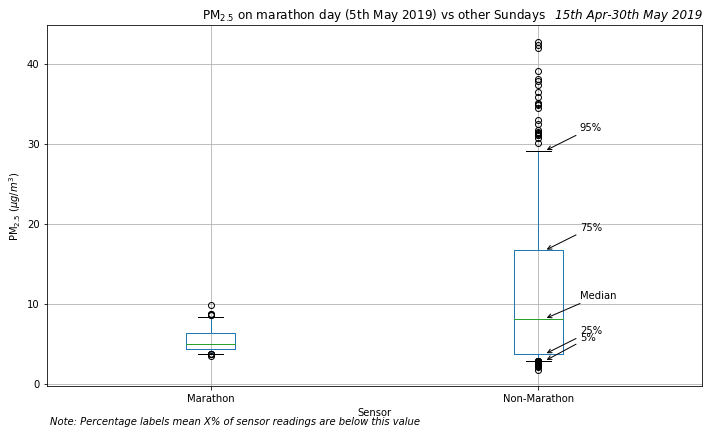

In [6]:
bpdict = just_sundays.boxplot(by='Marathon', whis=[5, 95], figsize=(10, 6), return_type='dict')
plt.suptitle('')
plt.title('$\mathrm{PM}_{2.5}$ on marathon day (5th May 2019) vs other Sundays')
plt.title('15th Apr-30th May 2019', loc='right', fontstyle='italic')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Sensor')
plt.tight_layout()
plt.savefig('graphs/MarathonBoxplot.png', dpi=300)
annotate_boxplot(bpdict['Mean'], x_loc=1, x_offset=0.02)
plt.annotate("Note: Percentage labels mean X% of sensor readings are below this value",
              (0.07, 0.015), xycoords='figure fraction', fontstyle='italic')
plt.savefig('graphs/MarathonBoxplot_Ann.png', dpi=300)

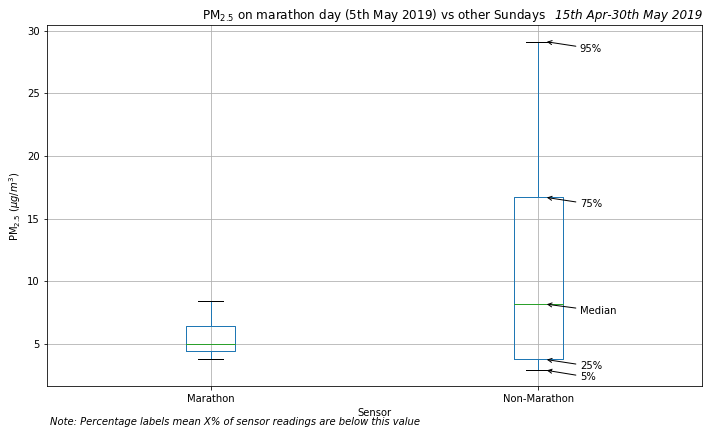

In [10]:
bpdict = just_sundays.boxplot(by='Marathon', showfliers=False, whis=[5, 95], figsize=(10, 6), return_type='dict')
plt.suptitle('')
plt.title('$\mathrm{PM}_{2.5}$ on marathon day (5th May 2019) vs other Sundays')
plt.title('15th Apr-30th May 2019', loc='right', fontstyle='italic')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Sensor')
plt.tight_layout()
plt.savefig('graphs/MarathonBoxplot_NoOutliers.png', dpi=300)
annotate_boxplot(bpdict['Mean'], x_loc=1, x_offset=0.02, text_offset_y=-10)
plt.annotate("Note: Percentage labels mean X% of sensor readings are below this value",
              (0.07, 0.015), xycoords='figure fraction', fontstyle='italic')
plt.savefig('graphs/MarathonBoxplot_NoOutliers_Ann.png', dpi=300)